<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U2)=
# Unidad 2

## Ecuaciones Diferenciales de Orden Superior

En el capítulo anterior, estudiamos diversas ecuaciones diferenciales de primer orden y cómo estas se aplican al análisis y soluciones de problemas. Es este capítulo, estudiaremos EDO donde aparezcan derivadas de orden mayor que $1$.

### Sistemas Masa-Resorte. Movimiento Libre 

Un resorte se suspende verticalmente de un soporte rígido y luego se le fija una masa $m$ a su extremo libre. La cantidad de alargamiento o elongación del resorte depende de la masa (mayor masa, mayor elongación). Por la [**ley de Hooke**](https://en.wikipedia.org/wiki/Hooke%27s_law), el resorte mismo ejerce una fuerza restauradora $F_r$ opuesta a la dirección de elongación, y es proporcional a la cantidad de elongación $s$. Se expresa como 

$$
F_r=ks,
$$ 

donde $k$ es una constante de proporcionalidad llamada **constante del resorte**.

Después de que se une una masa $m$ a un resorte, esta alarga el resorte una cantidad $s$ y logra una posición de equilibrio en la cual su peso $W$ se equilibra mediante la fuerza restauradora $ks$. La **condición de equilibrio** es $mg=ks$. Posteriormente, si la masa se desplaza una cantidad $x$ de su posición de equilibrio, la fuerza restauradora del resorte es entonces $F_r=k(x+s)$.

```{figure} masa1.png
---
height: 200px
name: Masa-Resorte
---
Sistema Masa-Resorte
```

Suponiendo que no hay fuerzas restauradoras adicionales que actúan sobre el sistema masa-resorte y suponiendo que la masa vibra libre de otras fuerzas externas (**movimiento libre**), usando la segunda ley de Newton, obtenemos

$$
m\ddot x=\sum F~\Rightarrow~m\ddot x=-F_r+W~,~\text{es decir}
$$ 

$$
m\frac{d^2x}{dt^2}=-k(x+s)+mg~\Rightarrow~m\frac{d^2x}{dt^2}=-kx~\Leftrightarrow~\frac{d^2x}{dt^2}+\frac{k}{m}x=0.
$$ 
Esta es una EDO lineal de segundo orden con coeficientes constantes que puede ser reescrita como 

$$
\frac{d^2x}{dt^2}+\omega^2x=0~~,~~\omega^2=\frac{k}{m}
$$ (eqMAS)

La EDO [](eqMAS) describe el <u>**movimiento armónico simple**</u> o <u>**movimiento libre no amortiguado**</u>. Podemos establecer un PVI considerando las condiciones de **desplazamiento inicial** $x(0)=x_0$ y **velocidad inicial** $x'(0)=v_0$.

**Convención**: Los desplazamientos medidos abajo de la posición de equilibrio son positivos:

```{figure} masa2.png
---
height: 200px
name: Masa-Resorte2
---
Convención del Signo
```

### Movimiento Libre Amortiguado

Supongamos ahora que la masa del sistema está sometida a una **fuerza de amortiguamiento** $F_a$, que es proporcional a la velocidad instantánea $\frac{dx}{dt}$, digamos que $F_a=\beta\frac{dx}{dt}$. 

```{figure} masa5.png
---
height: 200px
name: Masa-Resorte3
---
Sistema Masa-Resorte sometido a una Fuerza Amortiguadora
```

Cuando ninguna otra fuerza actúa sobre el sistema, se tiene que la segunda ley de Newton implica que 

$$
m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}
$$

O equivalentemente 

$$
\frac{d^2x}{dt^2}+2\lambda\frac{dx}{dt}+\omega^2x=0~,~\omega^2=\frac{k}{m}~,~2\lambda=\frac{\beta}{m}.
$$ (MLA)

La EDO [](MLA) describe el <u>**movimiento libre amortiguado**</u>.

### Movimiento Forzado

Finalmente, suponga que existe una fuerza externa $f(t)$ que actúa sobr el sistema masa-resorte amortiguado. La segunda ley de Newton implica que 

$$
m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}+f(t)
$$ 

o equivalentemente 

$$
\frac{d^2x}{dt^2}+2\lambda\frac{dx}{dt}+\omega^2x=F(t)~,~F(t)=\frac{f(t)}{m}.
$$ (MFA)

La EDO [](MFA) describe el <u>**movimiento forzado**</u>. 

Podemos visualizar en Python una comparación de estos 3 tipos de movimiento, considerando una fuerza externa del tipo  $f(t)=F_0\cos(\gamma t)$, donde $F_0$ es la **amplitud** y $\gamma$ la **frecuencia** de la fuerza externa:

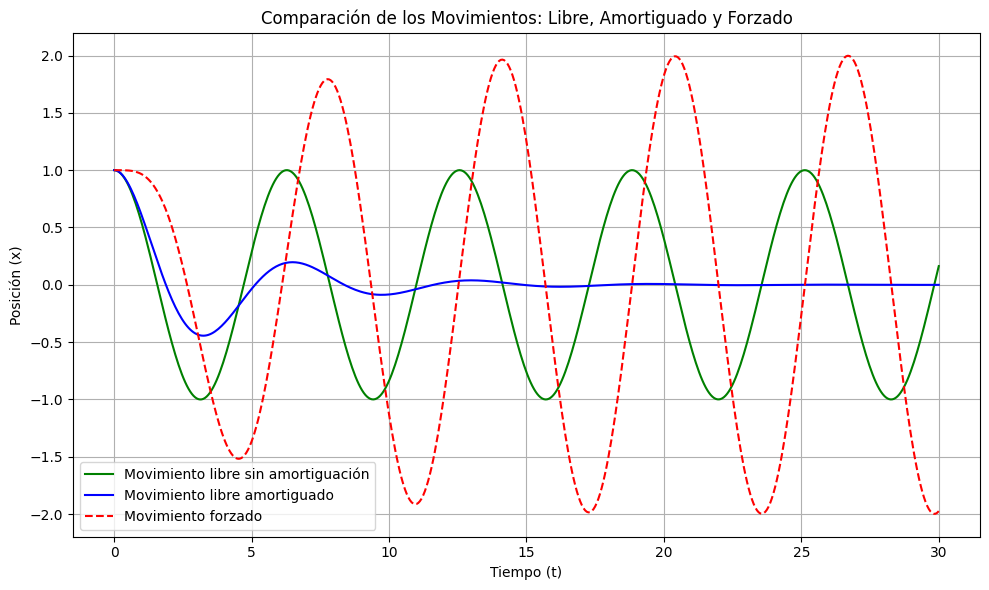

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0   # masa
k = 1.0   # constante del resorte
c = 0.5   # coeficiente de amortiguamiento
F0 = 1  # amplitud de la fuerza externa (puede ser 0 si no hay fuerza externa)
omega = 1.0  # frecuencia de la fuerza externa

# Definir el sistema de ecuaciones diferenciales: Una EDO de 2do orden se "separa" como un sistema para aplicar el
#el comando solve_ivp
def masa_resorte(t, y, m, k, beta, F0, gamma):
    x, v = y
    dxdt = v
    dvdt = -(k/m) * x - (beta/m) * v + (F0/m) * np.cos(gamma * t) #Fuerza externa F0*cos(gamma*t): se puede cambiar
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [1.0, 0.0]  # posición inicial x(0)=1, velocidad inicial x'(0)=0

# Tiempo de simulación
t_span = (0, 30)
t_eval = np.linspace(*t_span, 500)

# Resolver las ecuaciones diferenciales para los tres casos
sol_libre_sin_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, 0, 0, 0), t_eval=t_eval)
sol_libre_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, c, 0, 0), t_eval=t_eval)
sol_forzado = solve_ivp(masa_resorte, t_span, y0, args=(m, k, c, F0, omega), t_eval=t_eval)

# Graficar los resultados en un mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(sol_libre_sin_amort.t, sol_libre_sin_amort.y[0], label='Movimiento libre sin amortiguación', color='green')
plt.plot(sol_libre_amort.t, sol_libre_amort.y[0], label='Movimiento libre amortiguado', color='blue')
plt.plot(sol_forzado.t, sol_forzado.y[0], label='Movimiento forzado', linestyle='dashed', color='red')

plt.title('Comparación de los Movimientos: Libre, Amortiguado y Forzado')
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En los 3 casos anteriores, tenemos ecuaciones de segundo orden con coeficientes constantes: ¿Existe algún método para determinar sus soluciones de modo analítico? En las próximas sesiones, veremos un procedimiento para ello.